In [3]:
# Basic data handling
import numpy as np
import pandas as pd

# For loading the dataset
from sklearn.datasets import fetch_20newsgroups

# Text preprocessing
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import nltk

# For model building
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Setup
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Load training data (can also load 'test' subset later)
newsgroups = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

# Check keys available
print(newsgroups.keys())


dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [5]:
# Create a simple DataFrame
df = pd.DataFrame({
    'text': newsgroups.data,
    'target': newsgroups.target,
    'category': [newsgroups.target_names[i] for i in newsgroups.target]
})

# Quick peek
df.head()


,text,target,category
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...,10,rec.sport.hockey
1,From: mblawson@midway.ecn.uoknor.edu (Matthew ...,3,comp.sys.ibm.pc.hardware
2,From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...,17,talk.politics.mideast
3,From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...,3,comp.sys.ibm.pc.hardware
4,From: Alexander Samuel McDiarmid <am2o+@andrew...,4,comp.sys.mac.hardware


In [6]:
# Shape of data
print("Total documents:", df.shape[0])
print("\nSample categories:\n", df['category'].value_counts())

# Null check
df.isnull().sum()


Total documents: 18846

Sample categories:
 category
rec.sport.hockey            999
soc.religion.christian      997
rec.motorcycles             996
rec.sport.baseball          994
sci.crypt                   991
rec.autos                   990
sci.med                     990
comp.windows.x              988
sci.space                   987
comp.os.ms-windows.misc     985
sci.electronics             984
comp.sys.ibm.pc.hardware    982
misc.forsale                975
comp.graphics               973
comp.sys.mac.hardware       963
talk.politics.mideast       940
talk.politics.guns          910
alt.atheism                 799
talk.politics.misc          775
talk.religion.misc          628
Name: count, dtype: int64


text        0
target      0
category    0
dtype: int64

In [10]:
# Initialize stopwords and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    
    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)       # Remove punctuation
    text = re.sub(r'\d+', '', text)           # Remove numbers
    
    # Tokenize and remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]
    
    # Optional: Stemming
    words = [stemmer.stem(word) for word in words]
    
    return " ".join(words)


In [11]:
# This might take a few seconds
df['clean_text'] = df['text'].apply(preprocess_text)

# Preview cleaned text
df[['text', 'clean_text']].head(3)


,text,clean_text
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...,mamatha devineni ratnam mrandrewcmuedu subject...
1,From: mblawson@midway.ecn.uoknor.edu (Matthew ...,mblawsonmidwayecnuoknoredu matthew b lawson su...
2,From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...,hilmierdsvsus hilmi eren subject armenia say c...


In [16]:
# Import necessary libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Load the 20 Newsgroups dataset
newsgroups_data = fetch_20newsgroups(subset='all')

# X will be the text data (news articles), and y will be the corresponding labels (topics)
X = newsgroups_data.data
y = newsgroups_data.target

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to clean text
def clean_text(text):
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
    return text

# Apply cleaning to training and test data
X_train_clean = [clean_text(text) for text in X_train]
X_test_clean = [clean_text(text) for text in X_test]

# Now apply TF-IDF transformation
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform train data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_clean)

# Transform test data
X_test_tfidf = tfidf_vectorizer.transform(X_test_clean)

# Check the shape of the resulting matrices
print("TF-IDF Train Shape:", X_train_tfidf.shape)
print("TF-IDF Test Shape:", X_test_tfidf.shape)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


TF-IDF Train Shape: (15076, 5000)
TF-IDF Test Shape: (3770, 5000)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the training data
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 85.97%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       151
           1       0.70      0.79      0.74       202
           2       0.80      0.82      0.81       195
           3       0.66      0.69      0.68       183
           4       0.87      0.81      0.84       205
           5       0.83      0.80      0.81       215
           6       0.84      0.76      0.80       193
           7       0.86      0.88      0.87       196
           8       0.96      0.93      0.95       168
           9       0.91      0.95      0.93       211
          10       0.96      0.96      0.96       198
          11       0.96      0.94      0.95       201
          12       0.80      0.82      0.81       202
          13       0.92      0.91      0.91       194
          14       0.91      0.97      0.94       189
          15       0.86      0.94      0.90       202
          16       0.89      0.93      0

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],  # Use 'l2' regularization (can also try 'l1', 'elasticnet')
}

# Create the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train_tfidf, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and the corresponding score
print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters: {'C': 10, 'penalty': 'l2'}
Best Cross-Validation Score: 0.8709


In [21]:
# Get the best model after grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred_best = best_model.predict(X_test_tfidf)

# Evaluate performance
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Test Accuracy with Best Model: {accuracy_best * 100:.2f}%")

# Classification Report
print("\nClassification Report for Best Model:")
print(classification_report(y_test, y_pred_best))


Test Accuracy with Best Model: 87.43%

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       151
           1       0.72      0.79      0.75       202
           2       0.83      0.81      0.82       195
           3       0.66      0.72      0.69       183
           4       0.84      0.86      0.85       205
           5       0.85      0.82      0.83       215
           6       0.89      0.77      0.83       193
           7       0.89      0.90      0.90       196
           8       0.96      0.93      0.95       168
           9       0.95      0.92      0.94       211
          10       0.96      0.97      0.96       198
          11       0.96      0.95      0.96       201
          12       0.82      0.79      0.80       202
          13       0.92      0.92      0.92       194
          14       0.91      0.96      0.94       189
          15       0.90      0.95      0.92       202
    

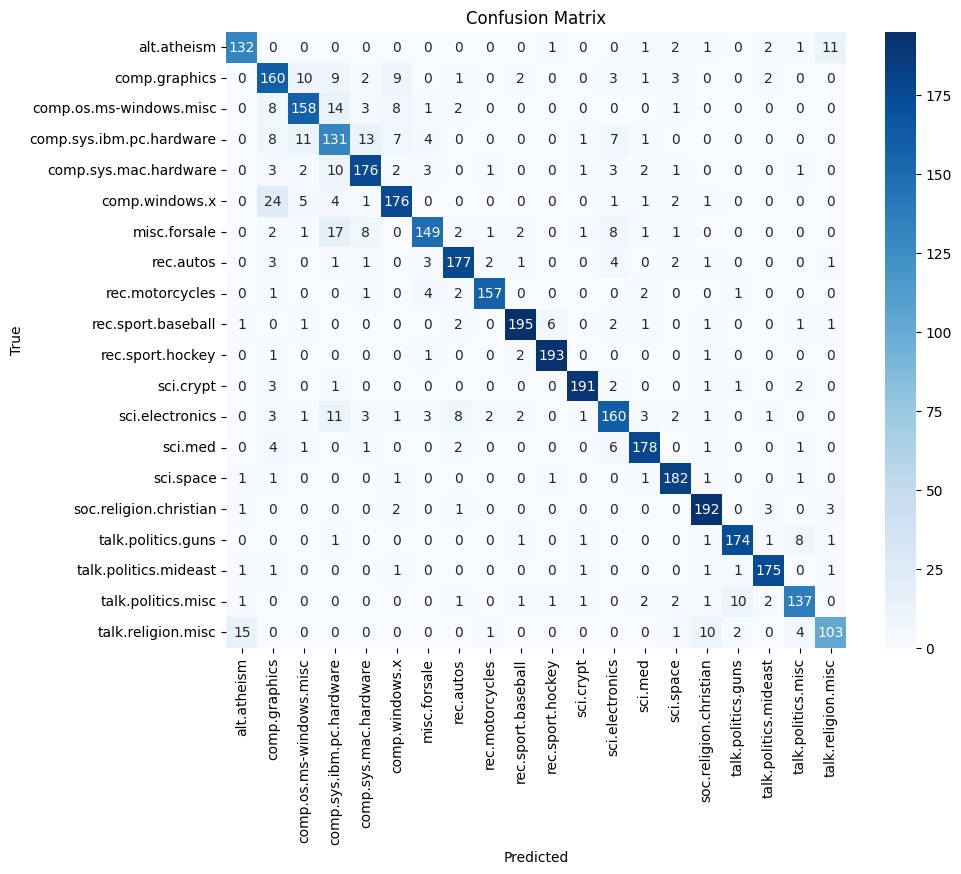

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict on the test set
y_pred = best_model.predict(X_test_tfidf)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=newsgroups.target_names, yticklabels=newsgroups.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [23]:
import numpy as np

# Get the feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get the coefficients for the model (important words)
coefficients = best_model.coef_

# For each class, get the top n important words
top_n = 10  # Number of top features to show
for i, class_name in enumerate(newsgroups.target_names):
    top_indices = coefficients[i].argsort()[-top_n:][::-1]  # Get top n words for each class
    top_words = [feature_names[idx] for idx in top_indices]
    top_scores = coefficients[i][top_indices]
    
    print(f"\nTop {top_n} words for class '{class_name}':")
    for word, score in zip(top_words, top_scores):
        print(f"{word}: {score:.3f}")



Top 10 words for class 'alt.atheism':
atheists: 7.669
god: 5.608
altatheism: 5.583
islamic: 5.517
keith: 5.225
mathew: 5.222
benedikt: 5.163
atheism: 5.041
bible: 5.020
tammy: 5.011

Top 10 words for class 'comp.graphics':
graphics: 11.856
image: 7.143
pov: 6.062
hacker: 5.701
tiff: 5.508
surface: 5.403
polygon: 5.369
siggraph: 5.331
images: 5.225
points: 5.014

Top 10 words for class 'comp.os.ms-windows.misc':
windows: 13.361
win: 7.811
microsoft: 6.957
bmp: 5.636
supporters: 5.498
challenge: 5.414
manager: 5.330
file: 5.218
nt: 5.090
maxaxaxaxaxaxaxaxaxaxaxaxaxaxax: 5.026

Top 10 words for class 'comp.sys.ibm.pc.hardware':
monitors: 6.234
bios: 5.881
dx: 5.793
card: 5.503
monitor: 5.488
gateway: 5.487
motherboard: 5.460
modems: 5.113
ide: 5.100
sx: 4.800

Top 10 words for class 'comp.sys.mac.hardware':
mac: 10.702
apple: 9.028
centris: 8.192
macs: 7.732
lc: 6.925
quadra: 6.898
se: 6.738
powerbook: 6.423
pb: 6.263
duo: 6.258

Top 10 words for class 'comp.windows.x':
motif: 8.805
xr: 

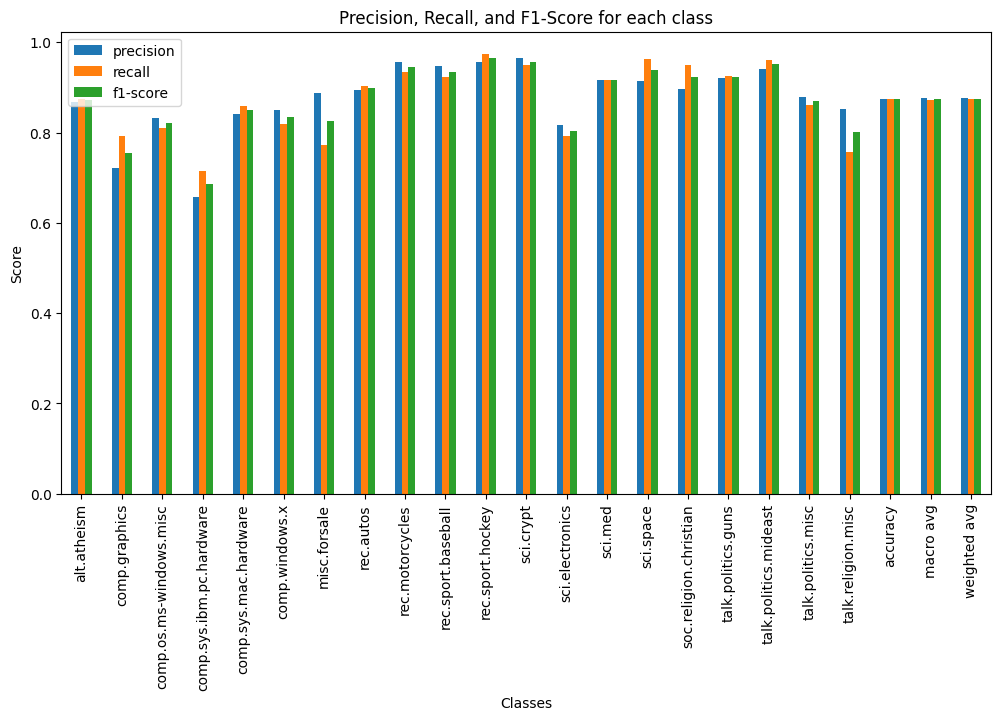

In [24]:
from sklearn.metrics import classification_report
import pandas as pd

# Get classification report
report = classification_report(y_test, y_pred, target_names=newsgroups.target_names, output_dict=True)

# Convert to DataFrame for better visualization
report_df = pd.DataFrame(report).transpose()

# Plot precision, recall, and F1-score
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(12, 6))
plt.title('Precision, Recall, and F1-Score for each class')
plt.ylabel('Score')
plt.xlabel('Classes')
plt.xticks(rotation=90)
plt.show()


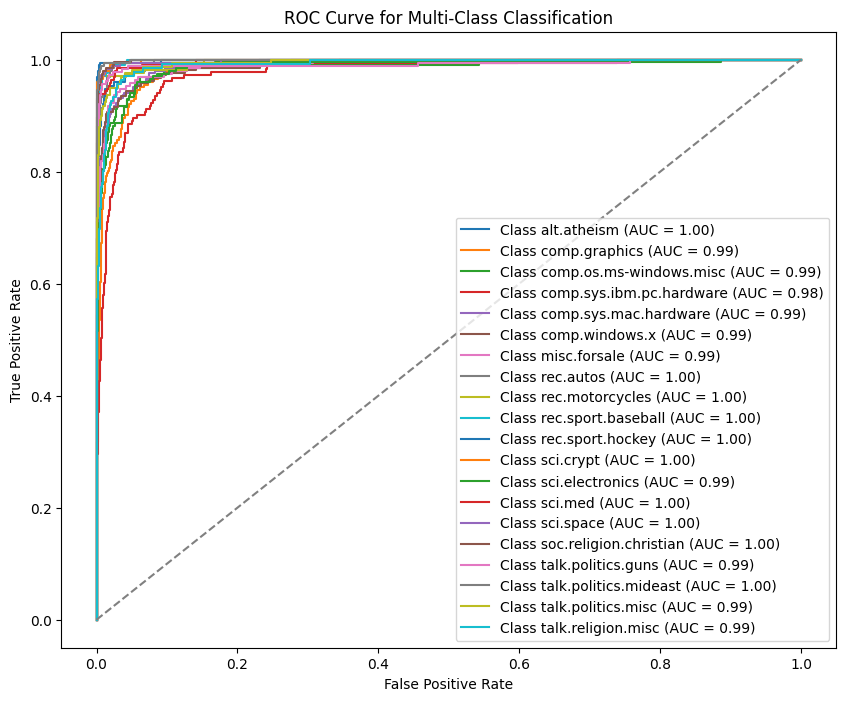

In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Binarize the output labels for multi-class ROC curve
y_test_bin = label_binarize(y_test, classes=range(len(newsgroups.target_names)))
y_pred_bin = best_model.predict_proba(X_test_tfidf)

# Compute ROC curve and AUC for each class
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 8))
for i in range(len(newsgroups.target_names)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {newsgroups.target_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()


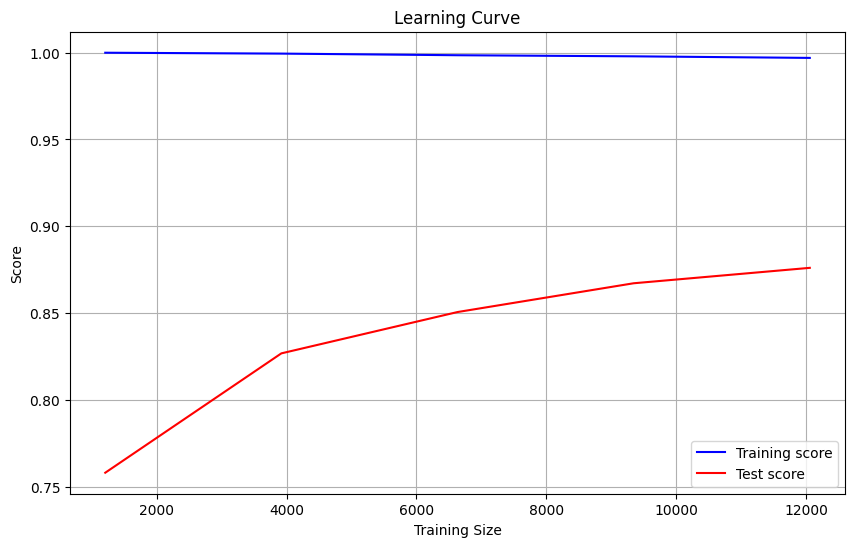

In [26]:
from sklearn.model_selection import learning_curve

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(best_model, X_train_tfidf, y_train, cv=5)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training score", color='blue')
plt.plot(train_sizes, test_scores.mean(axis=1), label="Test score", color='red')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()
